The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler

0. Data Folder: /home/strider/projects/compressiveSensing/cs_methods/noniterative/data/original/SRCNN/Train/

2. X: (22750, 1, 1089)  y: (22750, 1, 1089)


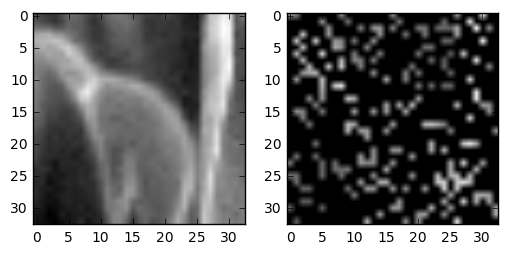

In [23]:
"""
URL : mmlab.ie.cuhk.edu.hk/projects/SRCNN/SRCNN_train.zip
"""

%load_ext line_profiler

import os
import joblib
import numpy as np
from tqdm import tqdm_notebook
import scipy.ndimage as spimg
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image

np.random.seed(7)
%matplotlib inline

""" 1. GET ORIGINAL DATA AND CONVERT INTO PATCHES """
def get_data(url_local, filename_alldata, filename_phi
                     , WIDTH, HEIGHT, MR, MAX_PATCHES, plt_show=True): 
    objs = []
    idx_rand = np.random.randint(0, len(os.listdir(url_local)))
    if plt_show : f, axarr = plt.subplots(1,2)
        
    for i, file in enumerate(os.listdir(url_local)) : 
        obj = spimg.imread(url_local + '/' + file, flatten=True, mode = 'L')
        if i == idx_rand:
            print ('1. Image Shape:', obj.shape)
            
        obj_patches = image.extract_patches_2d(obj, (WIDTH, HEIGHT), max_patches=MAX_PATCHES)
        for j, obj_patch in enumerate(obj_patches):
            objs.append(obj_patch)
            if i == idx_rand and j == idx_rand:
                print ('1. Patch Shape:', obj_patch.shape)
                if plt_show : 
                    axarr[0].imshow(obj, cmap = plt.cm.gray)
                    axarr[1].imshow(obj_patches[0], cmap = plt.cm.gray)
    
    print ('1. Total Data Patches:', len(objs))
    with open(filename_alldata, 'wb') as handle:
        joblib.dump(objs, handle, compress=True)
    
    phi = np.random.choice([0, 1], size=(1, WIDTH * HEIGHT), p=[1.0 - MR, MR])
    with open(filename_phi, 'wb') as handle:
        joblib.dump(phi, handle, compress=True)
        print ('1. Phi:', np.unique(phi, return_counts=True))

def get_data_transform(url_file, url_filename_alldata, url_filename_phi, url_filename_X, url_filename_y
                           , WIDTH, HEIGHT, test=0):
    with open(url_filename_alldata, 'rb') as handle:
        data_patches = joblib.load(handle)
    
    with open(url_filename_phi, 'rb') as handle:
        phi = joblib.load(handle)
        
    X = []; y = []
    
    if test : 
        rand_idx = 0
        test_iters = int(len(data_patches)/10)
    else:
        rand_idx = np.random.randint(0, len(data_patches))
    
    with tqdm_notebook(total = len(data_patches)) as pbar:
        for i, data_patch in enumerate(data_patches):
            pbar.update(1)
            y_temp = data_patch.reshape((1, data_patch.shape[0] * data_patch.shape[1]))
            # X_temp = y_temp * phi
            X_temp = np.multiply(y_temp, phi)
            if (test == 1) and (i == rand_idx):
                print ('2. Original Data Shape(y): ', data_patch.shape)
                print ('2. Reshaped Data Shape(y): ', y_temp.shape)
                print ('2. Reshaped Data Shape(X): ', X_temp.shape)
            if i == rand_idx:
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(y_temp.reshape((WIDTH,HEIGHT)), cmap = plt.cm.gray)
                axarr[1].imshow(X_temp.reshape((WIDTH,HEIGHT)), cmap = plt.cm.gray)
            
            y.append(y_temp)
            X.append(X_temp)
            
            if test == 1:
                if i > test_iters:
                    break
    
    X = np.array(X)
    y = np.array(y)
    print ('2. X:', X.shape, ' y:', y.shape)

    with open(url_filename_X, 'wb') as handle:
        joblib.dump(X, handle, compress=True)
    with open(url_filename_y, 'wb') as handle:
        joblib.dump(y, handle, compress=True)

if __name__ == "__main__":
    """ BASIC PARAMS """
    MR = 0.2
    WIDTH = 33
    HEIGHT = 33
    MAX_PATCHES = 250
    
    """ LOCAL URLS """
    url_file             = os.getcwd()
    url_local            = url_file + '/data/original/SRCNN/Train/'
    url_mr_folder        = 'mr' + str(int(MR*100))
    url_filename_alldata = url_file + '/data/' + url_mr_folder + '/data_patches.gz'
    url_filename_phi     = url_file + '/data/' + url_mr_folder + '/data_phi.gz'
    url_filename_X       = url_file + '/data/' + url_mr_folder + '/data_patches_X.gz'
    url_filename_y       = url_file + '/data/' + url_mr_folder + '/data_patches_y.gz'
    
    data_folder = url_file + '/data/' +  url_mr_folder
    if not(os.path.exists(url_file + '/data/' +  url_mr_folder)):
        os.mkdir()
    print ('\n0. Data Folder:', url_local)
    
    # get_data get_data(url_local, url_filename_alldata, url_filename_phi, WIDTH, HEIGHT, MR, MAX_PATCHES)
    get_data_transform(url_file, url_filename_alldata, url_filename_phi, url_filename_X, url_filename_y, WIDTH, HEIGHT, test=0)
    

In [13]:
%load_ext line_profiler
def foo():
    print (1)
    print (2)

%lprun -f foo foo()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
1
2
